## Bài 3: Viết chương trình nạp một ảnh, chuyển thành hệ màu HSV và lưu 3 ảnh với 3 màu khác nhau.

In [28]:
def exercise3(output_dir='bai3_output'):
    """
    Viết chương trình nạp một ảnh, chuyển thành hệ màu HSV và lưu 3 ảnh với 3 màu khác nhau.
    """
    # Tạo thư mục output nếu chưa tồn tại
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Tạo ảnh mẫu
    img = create_sample_image(output_dir)
    
    # Chuyển từ BGR sang RGB để hiển thị
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Chuyển từ BGR sang HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Tách các kênh H, S, V
    h, s, v = cv2.split(img_hsv)
    
    # Tạo 3 ảnh HSV với 3 màu khác nhau
    # Ảnh 1: Thay đổi Hue (màu sắc)
    hsv_mod1 = img_hsv.copy()
    hsv_mod1[:, :, 0] = (hsv_mod1[:, :, 0] + 60) % 180  # Dịch màu sắc 60 độ
    
    # Ảnh 2: Thay đổi Saturation (độ bão hòa)
    hsv_mod2 = img_hsv.copy()
    hsv_mod2[:, :, 1] = np.clip(hsv_mod2[:, :, 1] * 1.5, 0, 255).astype(np.uint8)  # Tăng độ bão hòa
    
    # Ảnh 3: Thay đổi Value (độ sáng)
    hsv_mod3 = img_hsv.copy()
    hsv_mod3[:, :, 2] = np.clip(hsv_mod3[:, :, 2] * 0.7, 0, 255).astype(np.uint8)  # Giảm độ sáng
    
    # Chuyển các ảnh HSV trở lại BGR để lưu
    img_mod1 = cv2.cvtColor(hsv_mod1, cv2.COLOR_HSV2BGR)
    img_mod2 = cv2.cvtColor(hsv_mod2, cv2.COLOR_HSV2BGR)
    img_mod3 = cv2.cvtColor(hsv_mod3, cv2.COLOR_HSV2BGR)
    
    # Lưu các ảnh
    cv2.imwrite(os.path.join(output_dir, 'hsv_hue_modified.jpg'), img_mod1)
    cv2.imwrite(os.path.join(output_dir, 'hsv_saturation_modified.jpg'), img_mod2)
    cv2.imwrite(os.path.join(output_dir, 'hsv_value_modified.jpg'), img_mod3)
    
    # Chuyển các ảnh BGR về RGB để hiển thị
    img_mod1_rgb = cv2.cvtColor(img_mod1, cv2.COLOR_BGR2RGB)
    img_mod2_rgb = cv2.cvtColor(img_mod2, cv2.COLOR_BGR2RGB)
    img_mod3_rgb = cv2.cvtColor(img_mod3, cv2.COLOR_BGR2RGB)
    
    # Hiển thị ảnh
    plt.figure(figsize=(15, 10))
    
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.title('Ảnh gốc (RGB)')
    plt.axis('off')
    
    plt.subplot(222)
    plt.imshow(img_mod1_rgb)
    plt.title('Thay đổi Hue (màu sắc)')
    plt.axis('off')
    
    plt.subplot(223)
    plt.imshow(img_mod2_rgb)
    plt.title('Tăng Saturation (độ bão hòa)')
    plt.axis('off')
    
    plt.subplot(224)
    plt.imshow(img_mod3_rgb)
    plt.title('Giảm Value (độ sáng)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Đã lưu 3 ảnh HSV đã chỉnh sửa vào thư mục '{output_dir}'.")

Chạy bài tập 3:

Đã tạo ảnh mẫu thành công tại bai3_output\sample_image.jpg!


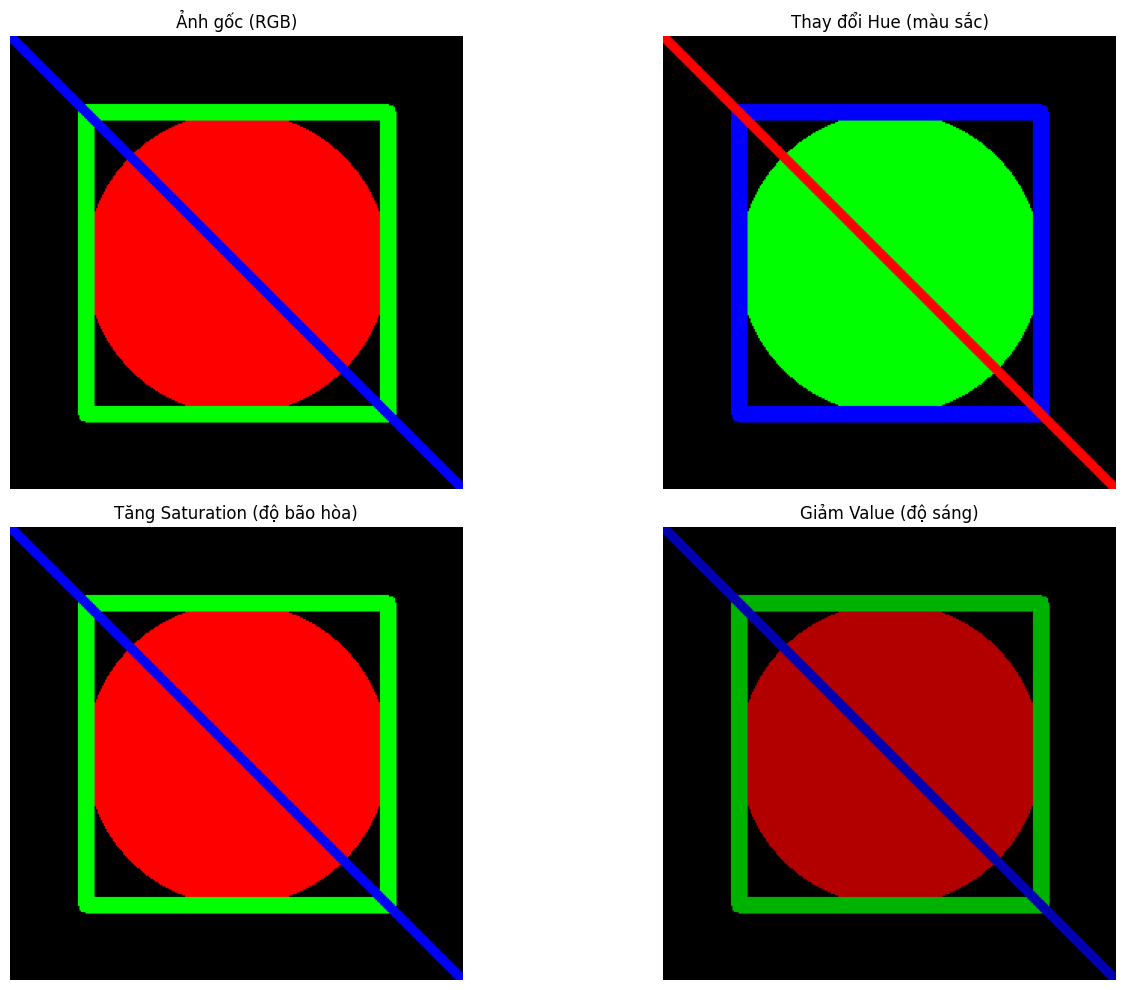

Đã lưu 3 ảnh HSV đã chỉnh sửa vào thư mục 'bai3_output'.


In [29]:
# Thực hiện bài tập 3
exercise3()

## Bài 4: Viết chương trình nạp một ảnh, chuyển sang hệ màu HSV. Lưu ảnh mới với kênh Hmax= 1/3 Hcũ, Vmax = 3 Vcũ.

In [30]:
def exercise4(output_dir='bai4_output'):
    """
    Viết chương trình nạp một ảnh, chuyển sang hệ màu HSV. 
    Lưu ảnh mới với kênh Hmax = 1/3 Hcũ, Vmax = 3 Vcũ.
    """
    # Tạo thư mục output nếu chưa tồn tại
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Tạo ảnh mẫu
    img = create_sample_image(output_dir)
    
    # Chuyển từ BGR sang RGB để hiển thị
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Chuyển từ BGR sang HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Tách các kênh H, S, V
    h, s, v = cv2.split(img_hsv)
    
    # Tạo ảnh mới với kênh Hmax = 1/3 Hcũ, Vmax = 3 Vcũ
    h_new = (h / 3).astype(np.uint8)  # Hmax = 1/3 Hcũ
    v_new = np.clip(v * 3, 0, 255).astype(np.uint8)  # Vmax = 3 Vcũ
    
    # Tạo ảnh HSV mới
    img_hsv_new = cv2.merge([h_new, s, v_new])
    
    # Chuyển ảnh HSV mới về BGR để lưu
    img_new = cv2.cvtColor(img_hsv_new, cv2.COLOR_HSV2BGR)
    
    # Lưu ảnh
    cv2.imwrite(os.path.join(output_dir, 'hsv_modified.jpg'), img_new)
    
    # Chuyển ảnh BGR về RGB để hiển thị
    img_new_rgb = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)
    
    # Hiển thị ảnh gốc và ảnh đã chỉnh sửa
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title('Ảnh gốc (RGB)')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(img_new_rgb)
    plt.title('Ảnh mới (Hmax=1/3 Hcũ, Vmax=3 Vcũ)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Hiển thị các kênh H, S, V trước và sau khi chỉnh sửa
    plt.figure(figsize=(15, 10))
    
    plt.subplot(231)
    plt.imshow(h, cmap='hsv')
    plt.title('Kênh H gốc')
    plt.axis('off')
    
    plt.subplot(232)
    plt.imshow(s, cmap='gray')
    plt.title('Kênh S gốc')
    plt.axis('off')
    
    plt.subplot(233)
    plt.imshow(v, cmap='gray')
    plt.title('Kênh V gốc')
    plt.axis('off')
    
    plt.subplot(234)
    plt.imshow(h_new, cmap='hsv')
    plt.title('Kênh H mới (1/3 Hcũ)')
    plt.axis('off')
    
    plt.subplot(235)
    plt.imshow(s, cmap='gray')
    plt.title('Kênh S (không đổi)')
    plt.axis('off')
    
    plt.subplot(236)
    plt.imshow(v_new, cmap='gray')
    plt.title('Kênh V mới (3 Vcũ)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Đã tạo ảnh mẫu thành công tại {output_dir}\\sample_image.jpg!")

Chạy bài tập 4:

Đã tạo ảnh mẫu thành công tại bai4_output\sample_image.jpg!


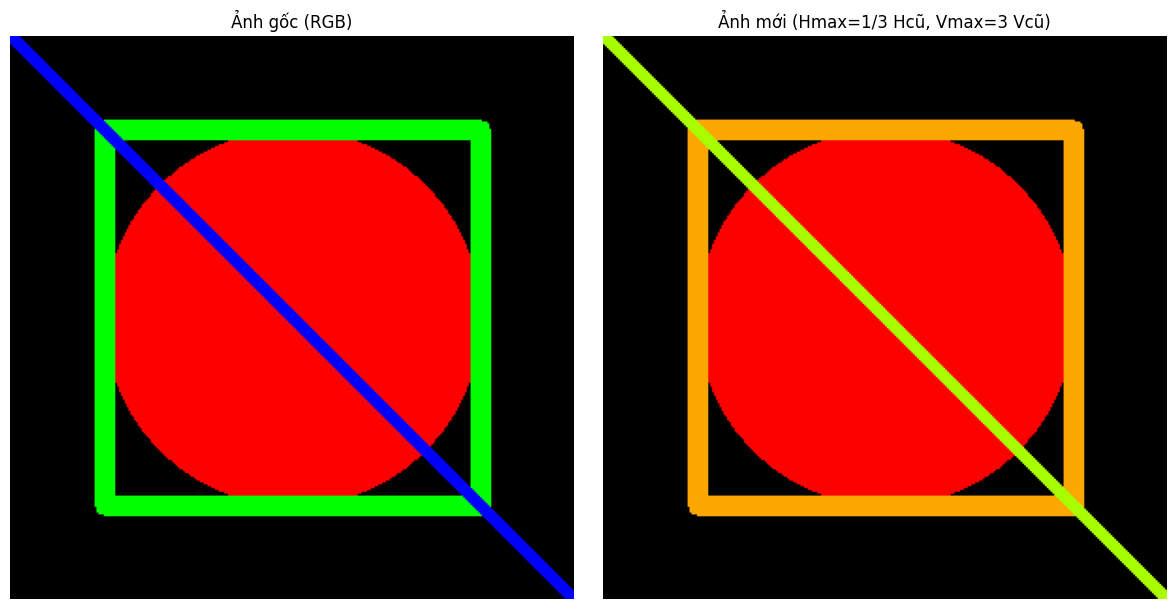

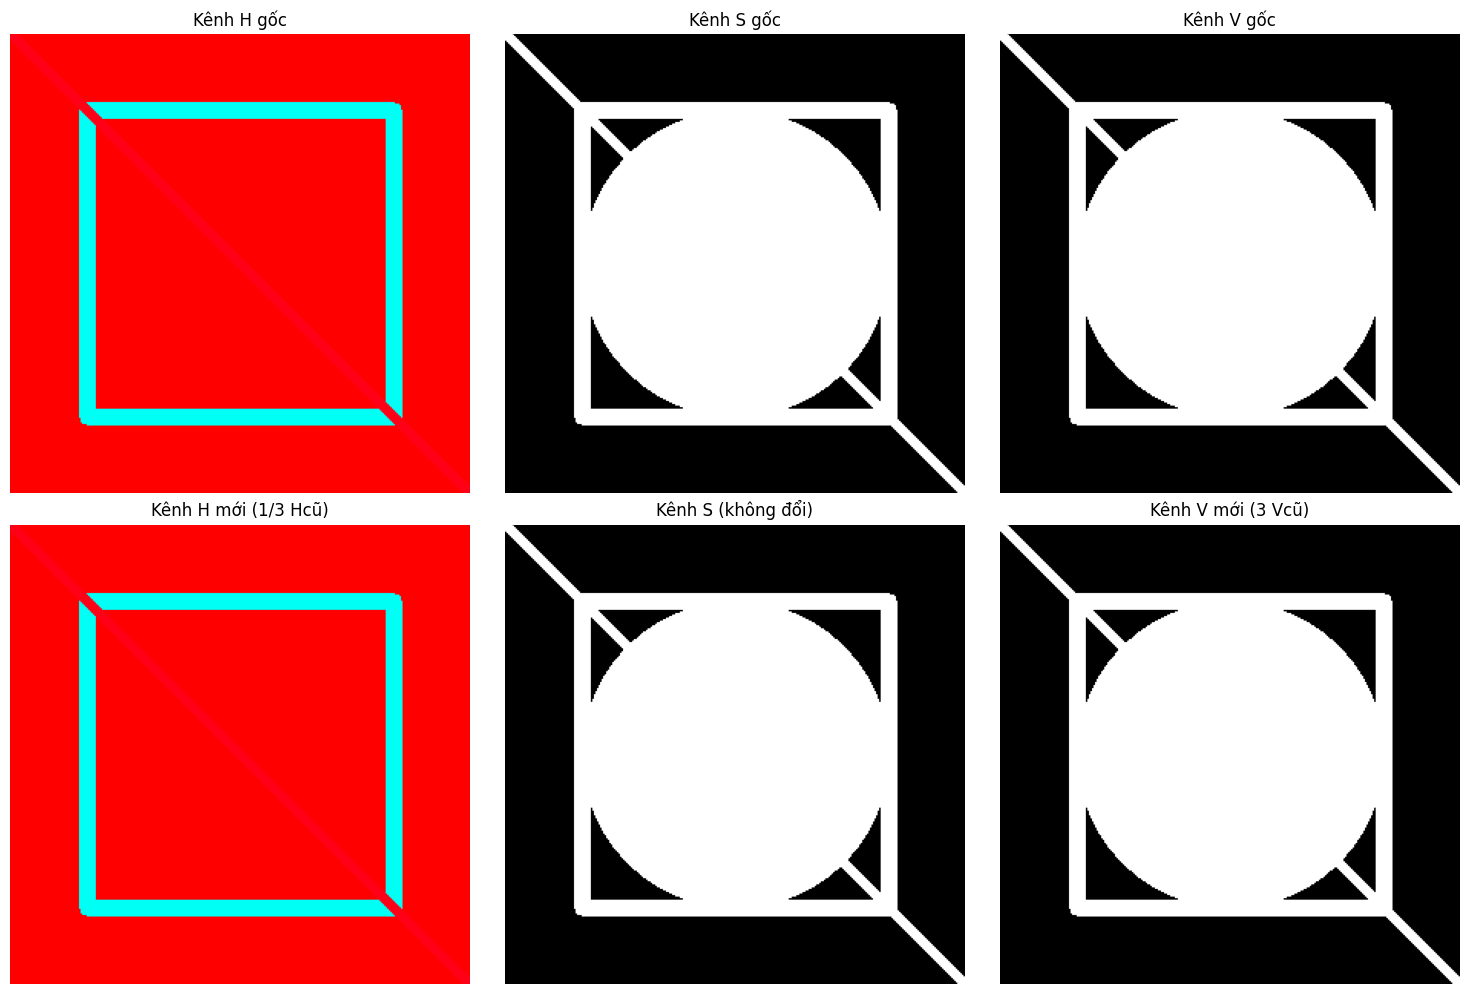

Đã tạo ảnh mẫu thành công tại bai4_output\sample_image.jpg!


In [31]:
# Thực hiện bài tập 4
exercise4()

## Bài 5: Viết chương trình sử dụng mean filter cho các hình trong thư mục Exercise

In [32]:
def create_sample_images(output_dir='Exercise'):
    """
    Tạo các ảnh mẫu cho bài tập 5
    """
    # Tạo thư mục để lưu ảnh mẫu
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Tạo một số ảnh mẫu với các hình dạng khác nhau
    # Ảnh 1: Hình tròn
    circle_img = np.zeros((300, 300, 3), dtype=np.uint8)
    cv2.circle(circle_img, (150, 150), 100, (0, 0, 255), -1)
    cv2.imwrite(os.path.join(output_dir, 'circle.jpg'), circle_img)
    
    # Ảnh 2: Hình vuông
    square_img = np.zeros((300, 300, 3), dtype=np.uint8)
    cv2.rectangle(square_img, (50, 50), (250, 250), (0, 255, 0), -1)
    cv2.imwrite(os.path.join(output_dir, 'square.jpg'), square_img)
    
    # Ảnh 3: Hình tam giác
    triangle_img = np.zeros((300, 300, 3), dtype=np.uint8)
    triangle_pts = np.array([[150, 50], [50, 250], [250, 250]], np.int32)
    triangle_pts = triangle_pts.reshape((-1, 1, 2))
    cv2.fillPoly(triangle_img, [triangle_pts], (255, 0, 0))
    cv2.imwrite(os.path.join(output_dir, 'triangle.jpg'), triangle_img)
    
    # Thêm nhiễu vào các ảnh để thấy rõ hiệu quả của mean filter
    # Ảnh 4: Hình tròn có nhiễu
    noisy_circle = circle_img.copy()
    noise = np.random.randint(0, 100, noisy_circle.shape, dtype=np.uint8)
    noisy_circle = cv2.add(noisy_circle, noise)
    cv2.imwrite(os.path.join(output_dir, 'noisy_circle.jpg'), noisy_circle)
    
    # Ảnh 5: Hình vuông có nhiễu
    noisy_square = square_img.copy()
    noise = np.random.randint(0, 100, noisy_square.shape, dtype=np.uint8)
    noisy_square = cv2.add(noisy_square, noise)
    cv2.imwrite(os.path.join(output_dir, 'noisy_square.jpg'), noisy_square)
    
    print(f"Đã tạo các ảnh mẫu trong thư mục '{output_dir}'.")
    return True

In [33]:
def apply_mean_filter(image, kernel_size):
    """
    Áp dụng mean filter (bộ lọc trung bình) cho ảnh
    """
    return cv2.blur(image, (kernel_size, kernel_size))

In [34]:
def exercise5(output_dir='bai5_output'):
    """
    Viết chương trình sử dụng mean filter cho các hình trong thư mục Exercise
    """
    # Tạo thư mục output nếu chưa tồn tại
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Tạo các ảnh mẫu nếu chưa có
    if not os.path.exists('Exercise') or len(os.listdir('Exercise')) == 0:
        create_sample_images()
    
    # Lấy danh sách các file ảnh trong thư mục Exercise
    image_files = [f for f in os.listdir('Exercise') if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    if not image_files:
        print("Không tìm thấy ảnh trong thư mục 'Exercise'.")
        return
    
    # Áp dụng mean filter với các kích thước kernel khác nhau
    kernel_sizes = [3, 5, 9, 15]
    
    for image_file in image_files:
        # Đọc ảnh
        img_path = os.path.join('Exercise', image_file)
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"Không thể đọc ảnh {img_path}. Bỏ qua.")
            continue
        
        # Chuyển từ BGR sang RGB để hiển thị
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Áp dụng mean filter với các kích thước kernel khác nhau
        filtered_images = []
        for kernel_size in kernel_sizes:
            filtered_img = apply_mean_filter(img, kernel_size)
            filtered_img_rgb = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)
            filtered_images.append((filtered_img, filtered_img_rgb, kernel_size))
            
            # Lưu ảnh đã lọc
            output_filename = f"{output_dir}/{os.path.splitext(image_file)[0]}_mean_{kernel_size}.jpg"
            cv2.imwrite(output_filename, filtered_img)
        
        # Hiển thị ảnh gốc và các ảnh đã lọc
        plt.figure(figsize=(15, 10))
        
        # Hiển thị ảnh gốc
        plt.subplot(2, 3, 1)
        plt.imshow(img_rgb)
        plt.title(f'Ảnh gốc: {image_file}')
        plt.axis('off')
        
        # Hiển thị các ảnh đã lọc
        for i, (_, filtered_rgb, kernel_size) in enumerate(filtered_images):
            plt.subplot(2, 3, i + 2)
            plt.imshow(filtered_rgb)
            plt.title(f'Mean Filter {kernel_size}x{kernel_size}')
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    
    print(f"Đã áp dụng mean filter và lưu các ảnh vào thư mục '{output_dir}'.")

Chạy bài tập 5:

In [35]:
# Tạo ảnh mẫu cho bài tập 5
create_sample_images()

Đã tạo các ảnh mẫu trong thư mục 'Exercise'.


True

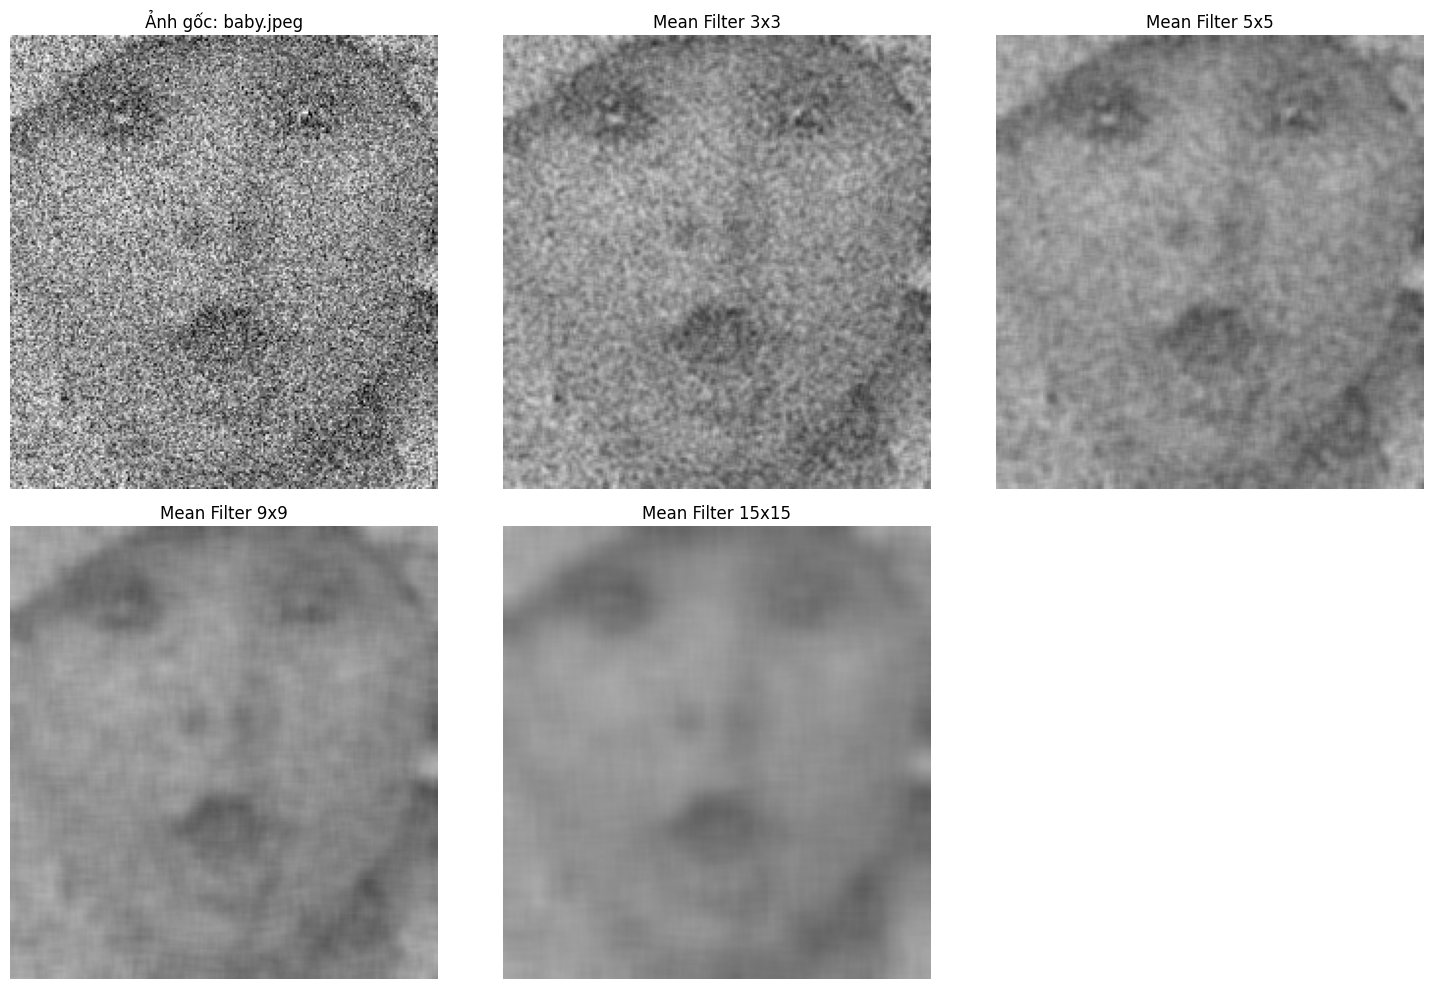

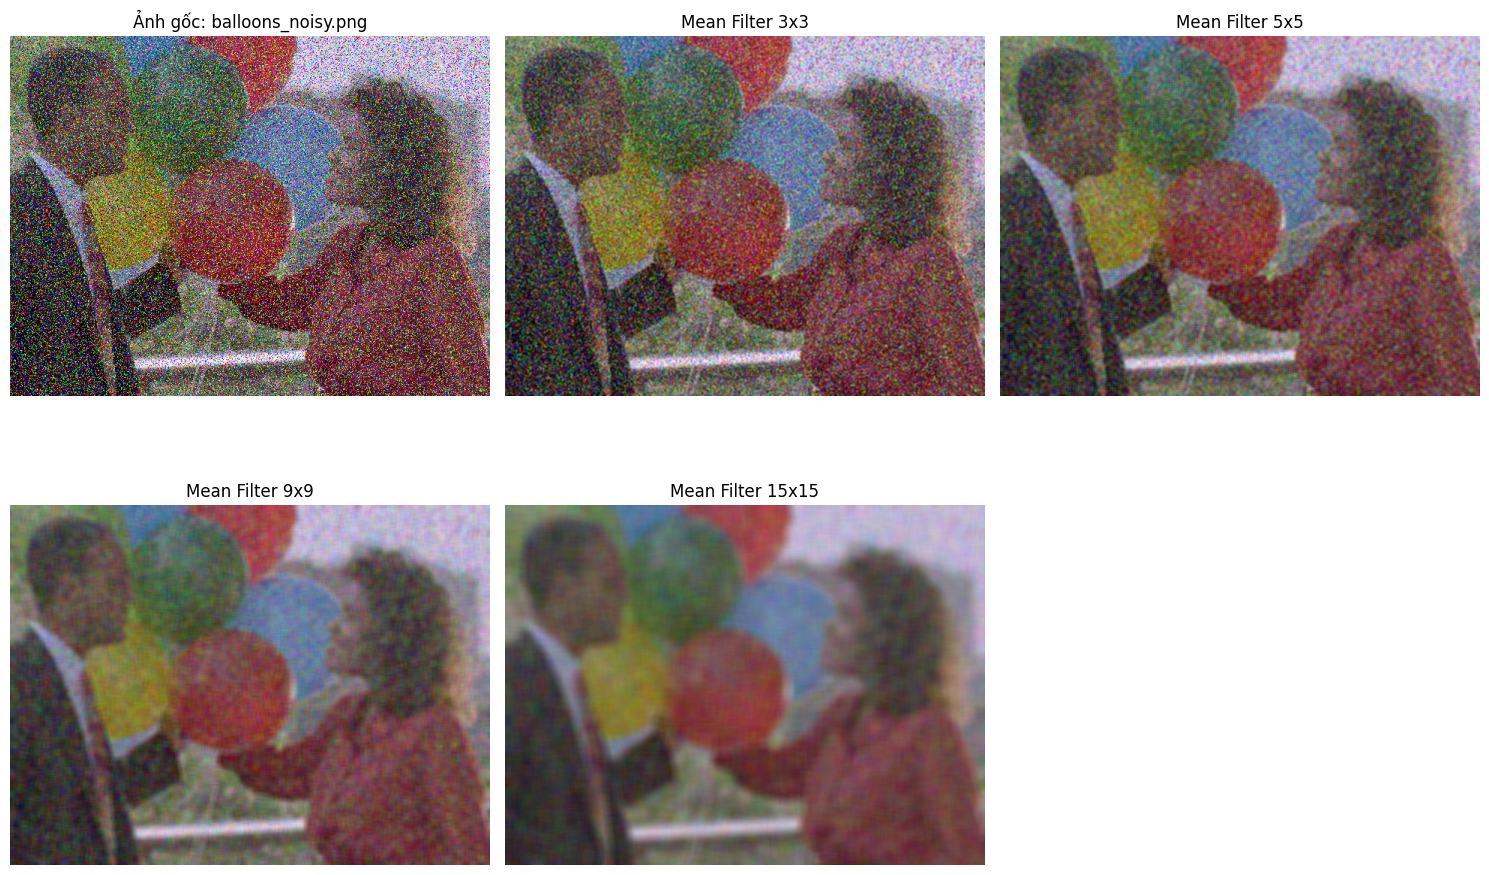

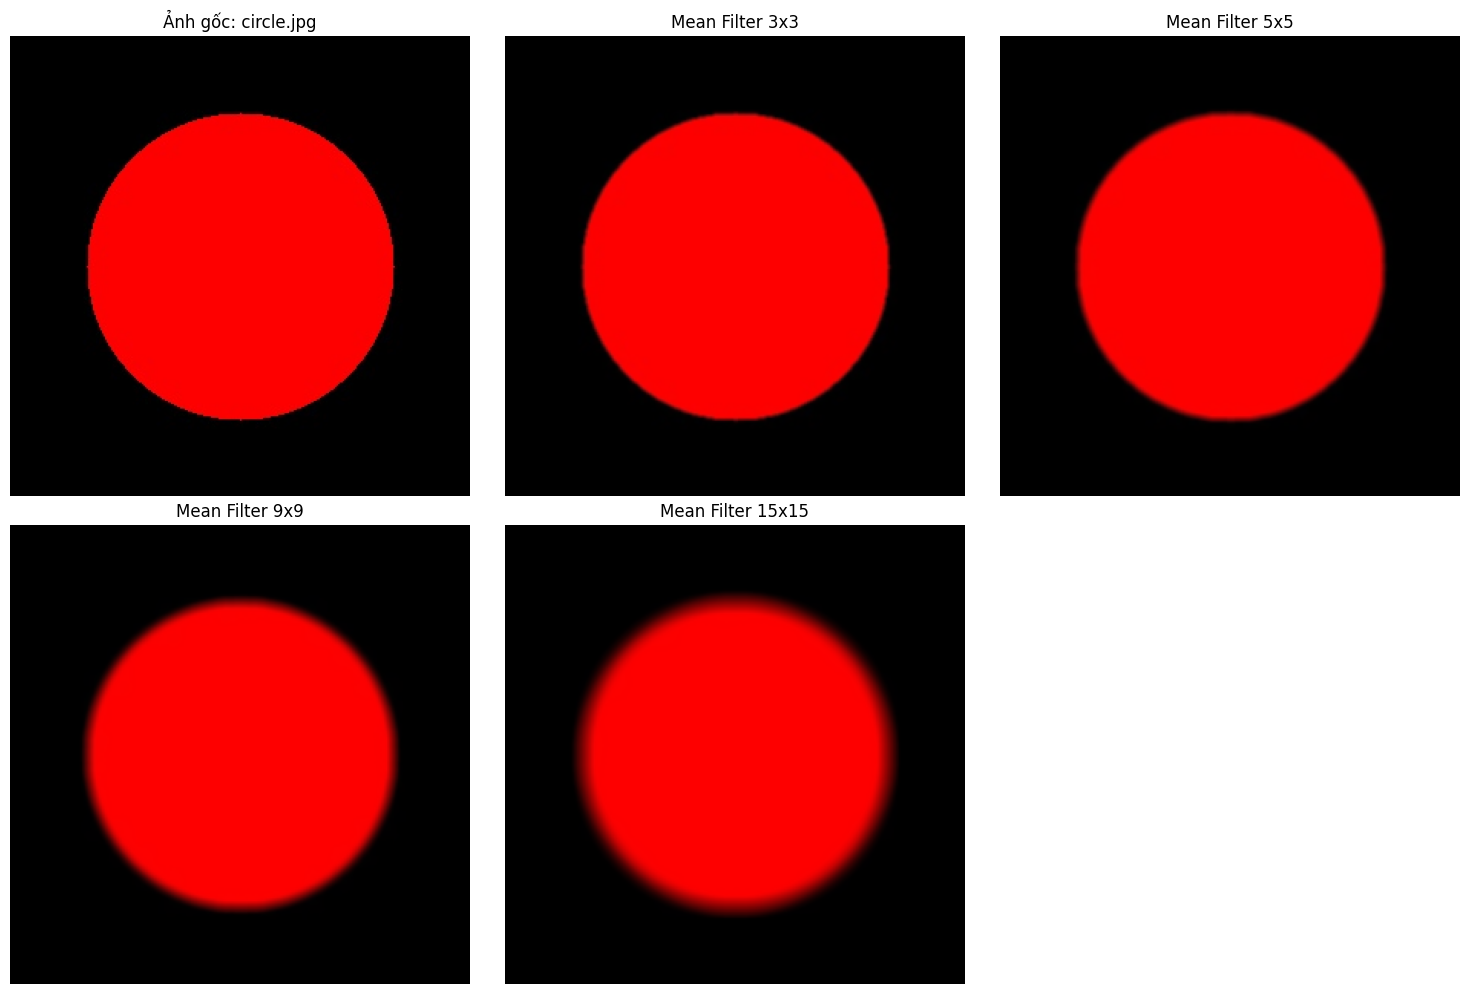

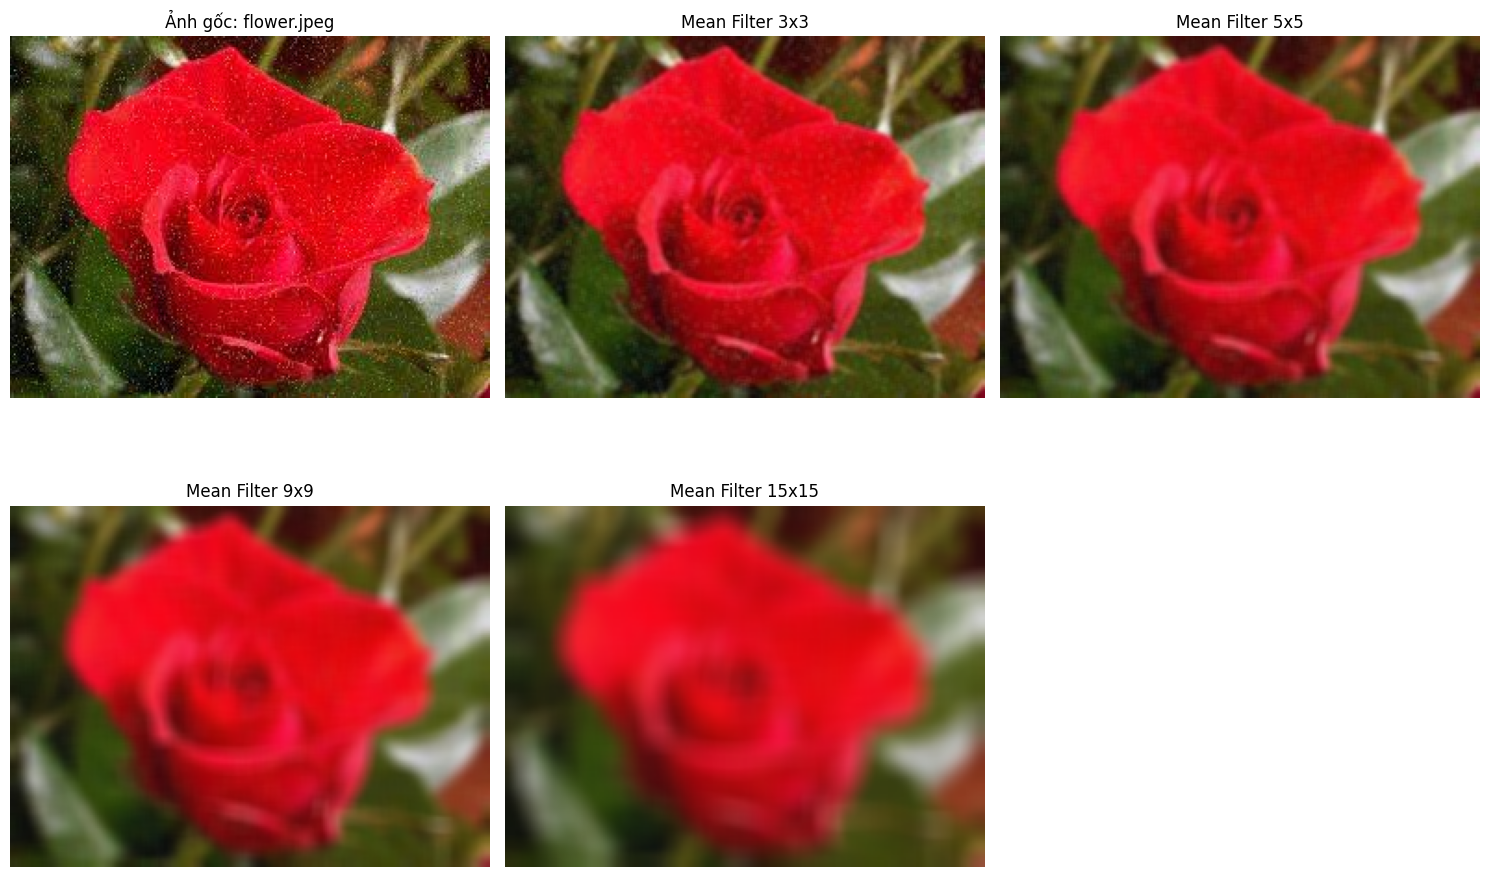

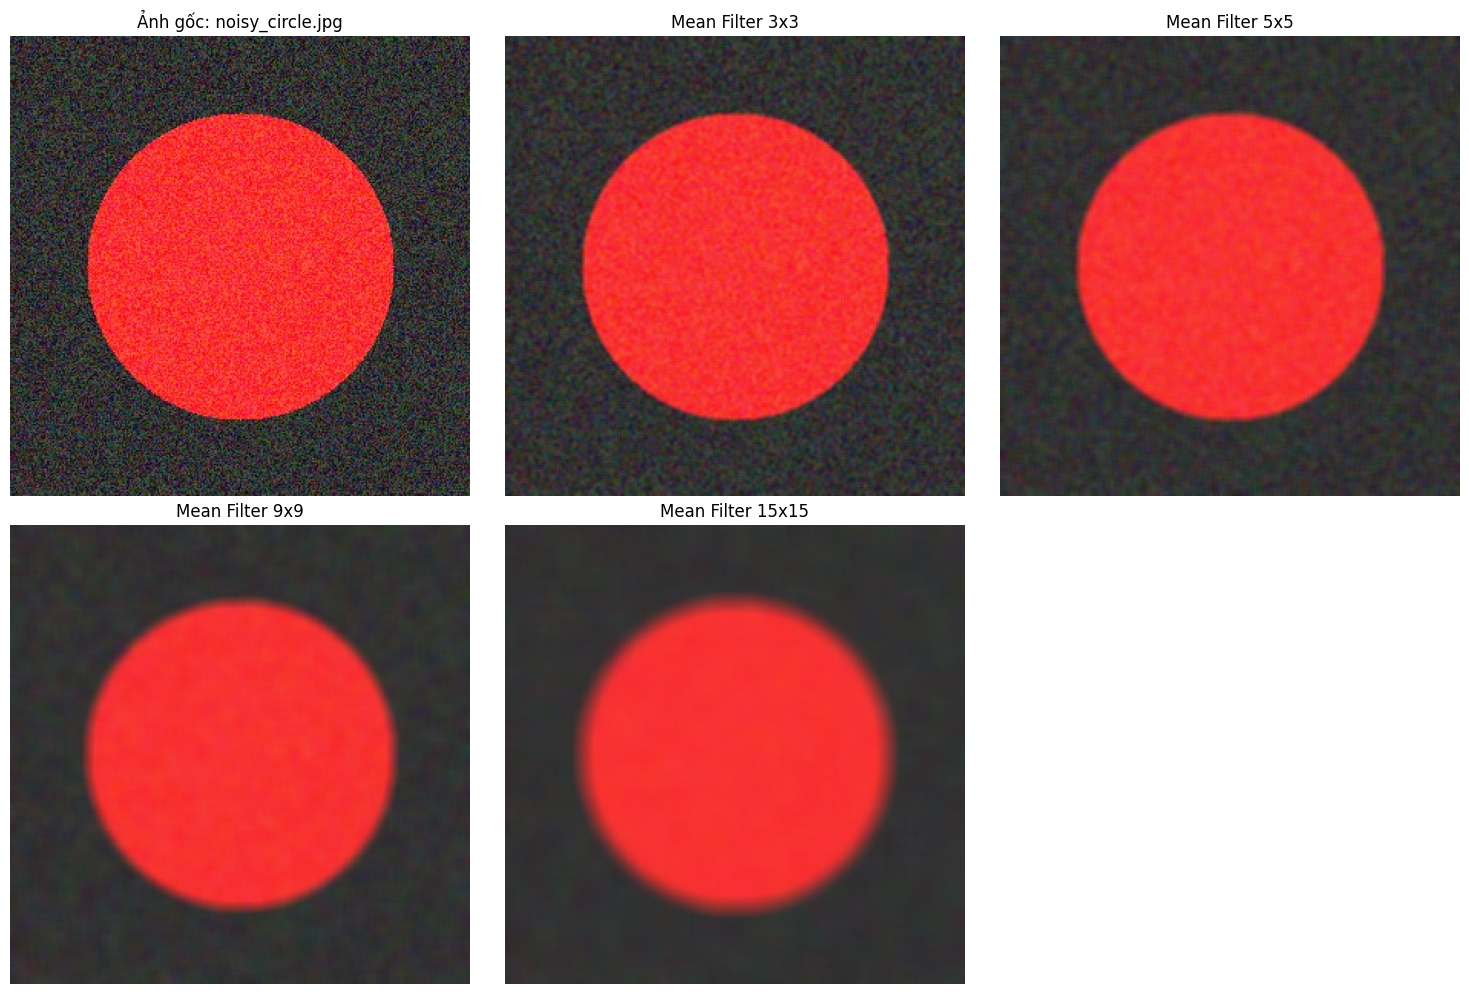

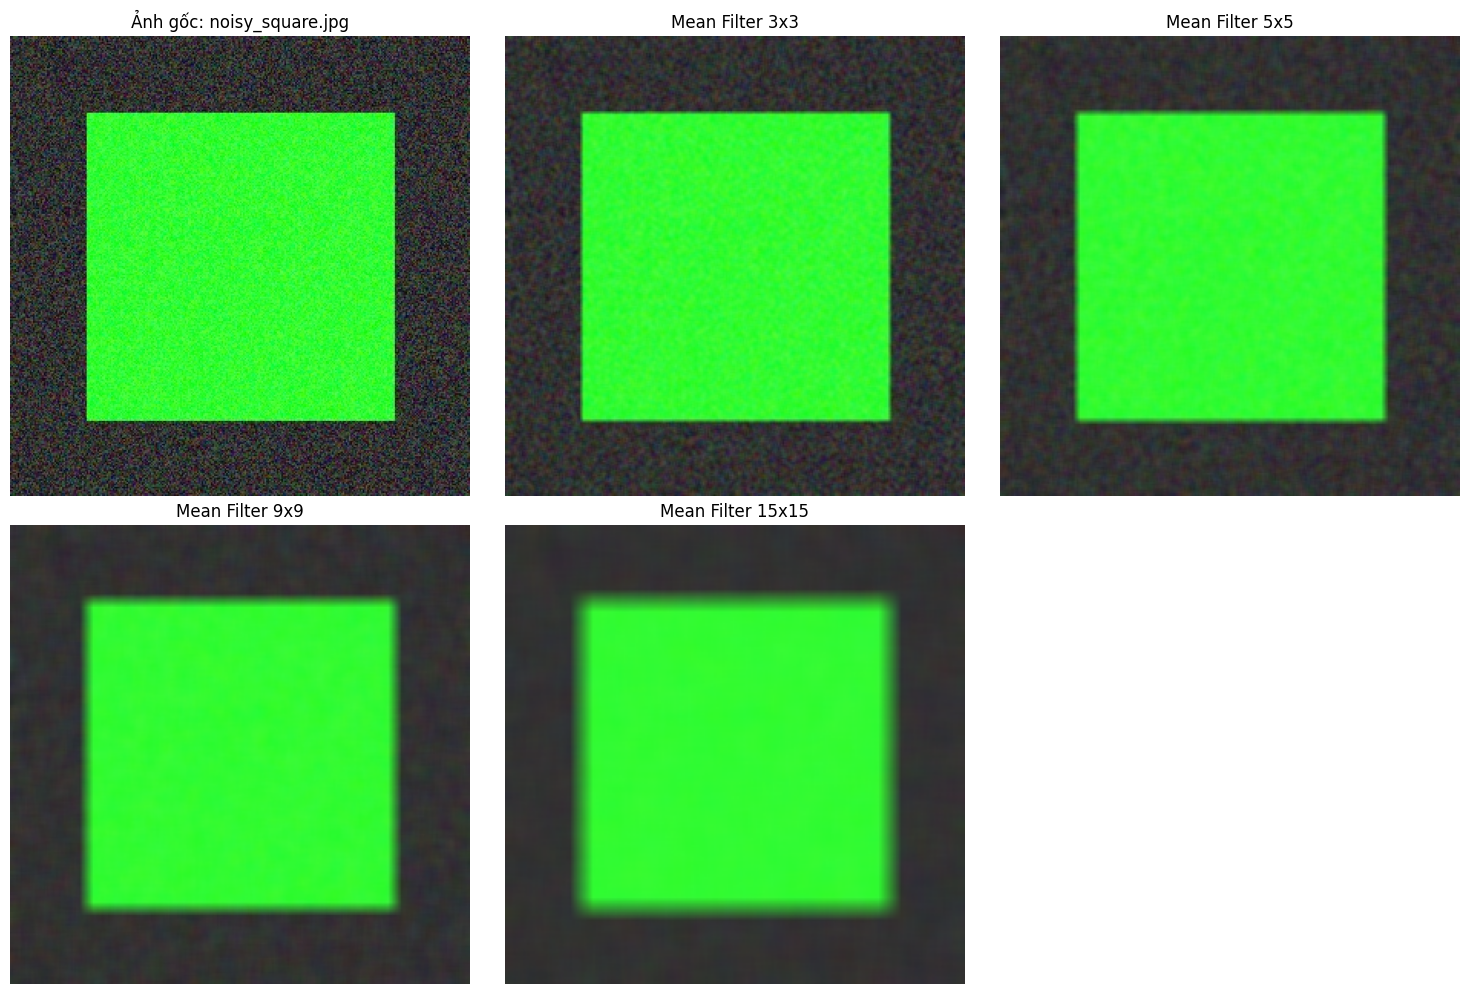

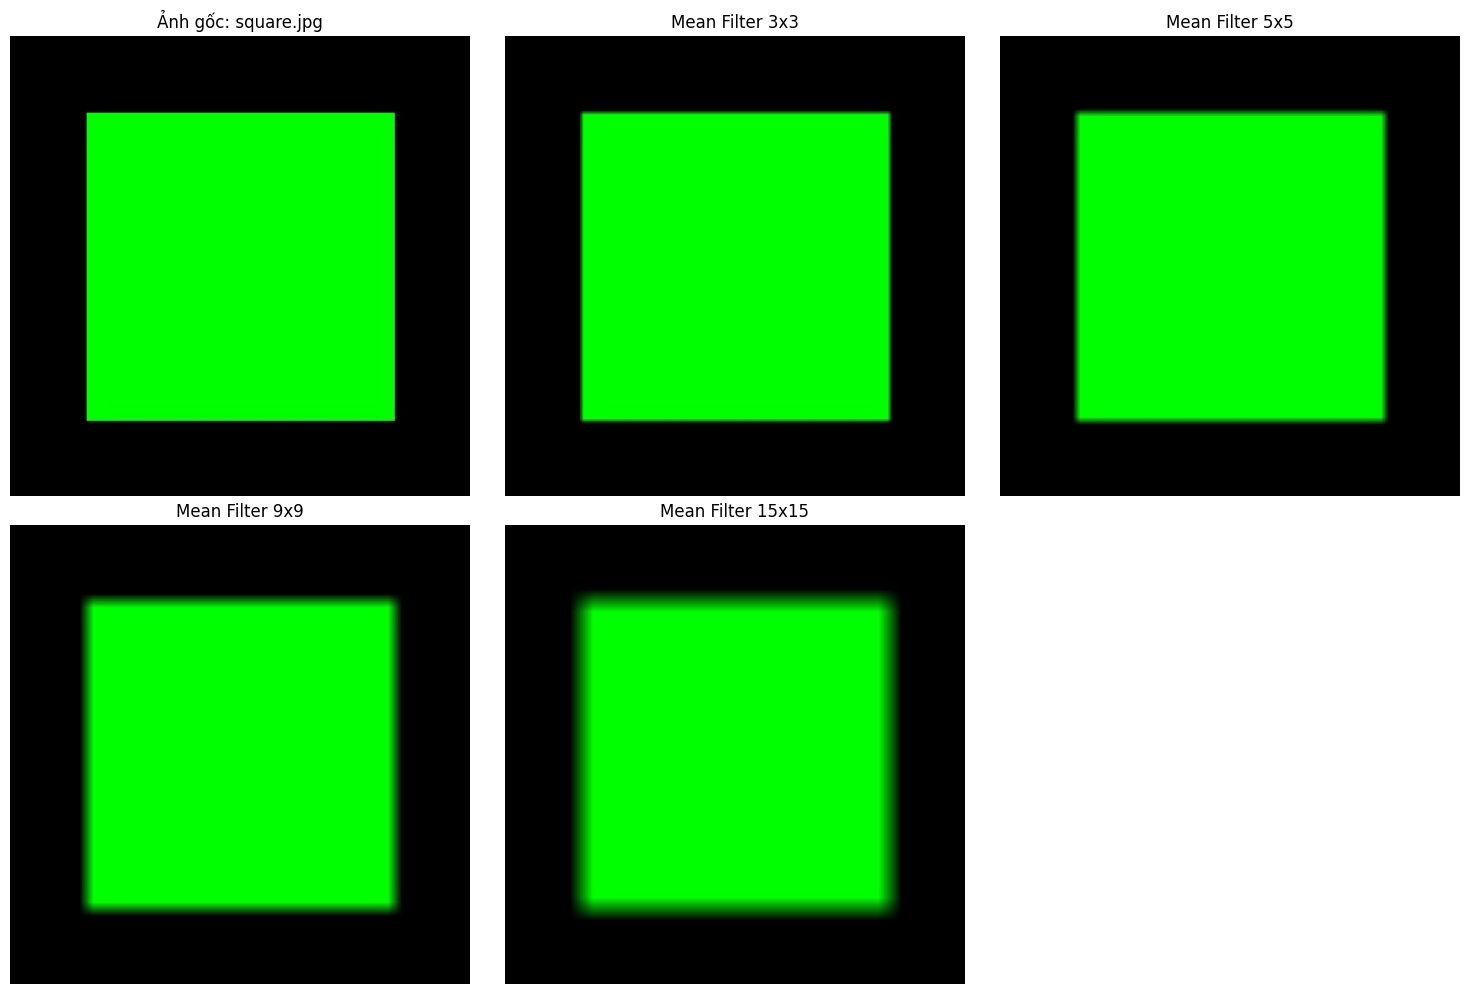

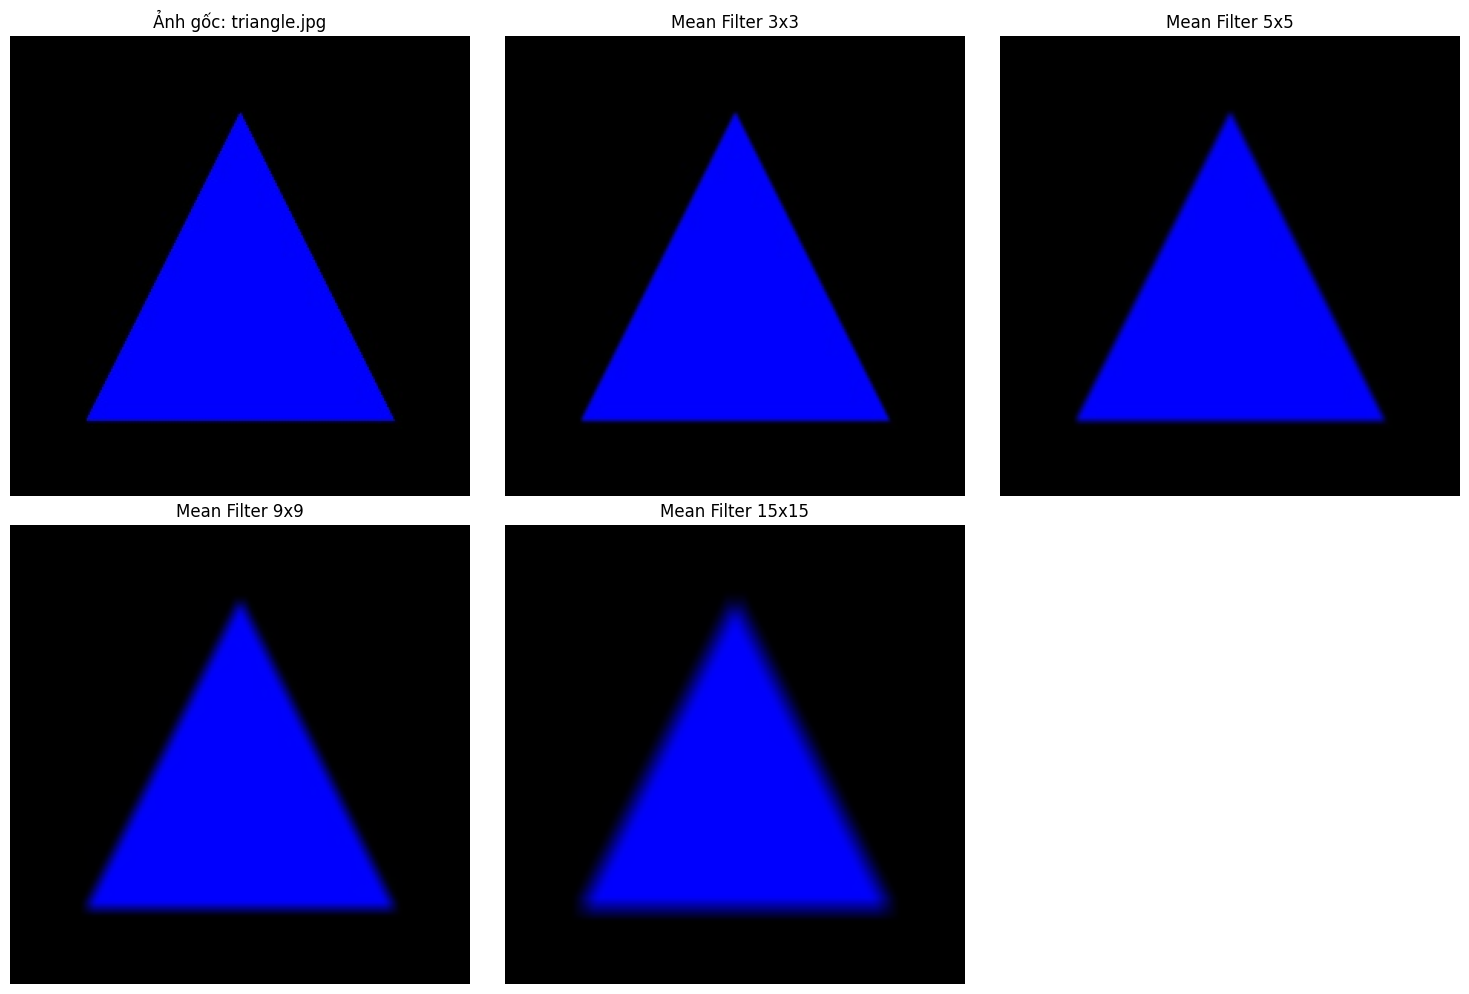

Đã áp dụng mean filter và lưu các ảnh vào thư mục 'bai5_output'.


In [36]:
# Thực hiện bài tập 5
exercise5()

## Chạy tất cả các bài tập

In [37]:
def run_all_exercises():
    """
    Chạy tất cả các bài tập
    """
    print("Bắt đầu chạy tất cả các bài tập...")
    
    print("\n--- Bài tập 1 ---")
    exercise1()
    
    print("\n--- Bài tập 2 ---")
    exercise2()
    
    print("\n--- Bài tập 3 ---")
    exercise3()
    
    print("\n--- Bài tập 4 ---")
    exercise4()
    
    print("\n--- Bài tập 5 ---")
    exercise5()
    
    print("\nĐã hoàn thành tất cả các bài tập!")

In [38]:
# Bỏ comment dòng dưới đây để chạy tất cả các bài tập
# run_all_exercises()